In [25]:
#Are there any consistent patterns in the timing and intensity of influenza seasons?

import pandas as pd
import numpy as np

df = pd.read_excel('America_Influenza.xlsx')

# print(f"inital df: {df.shape}")

#drop columns not related to influenza A and sort in order
columns_dropped = ['BVIC', 'BYAM', 'BNOTDETERMINED', 'INF_B', 'INF_ALL', 'INF_NEGATIVE']
df = df.drop(columns=columns_dropped)
df = df.dropna(subset=['INF_A'])

df_sorted = df.sort_values(['ISO_YEAR', 'ISO_WEEK'], ascending=[True,True])

# print(df_sorted.head())
# print(f"updated df: {df_sorted.shape}")

#check which years have enough data
unique_weeks_per_year = df_sorted.groupby('ISO_YEAR')['ISO_WEEK'].nunique().reset_index()
unique_weeks_per_year.columns = ['ISO_YEAR', 'Unique_ISO_Weeks']
for index, row in unique_weeks_per_year.iterrows():
    print(f"year: {row['ISO_YEAR']}, weeks counted: {row['Unique_ISO_Weeks']}")

#drop the years that dont have enough data
years_to_drop = [1997,1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2024]
df_cleaned = df_sorted[~df_sorted['ISO_YEAR'].isin(years_to_drop)]
print(df_cleaned['ISO_YEAR'].unique())

df_cleaned.reset_index(drop=True, inplace=True)

# df_cleaned
# df_cleaned.to_excel('America_Influenza_Cleaned.xlsx')

#find missing weeks in 2008
df_2008 = df_cleaned[df_cleaned['ISO_YEAR'] == 2008]
# get the unique ISO_WEEK present in the data for 2008
present_weeks = df_2008['ISO_WEEK'].unique()
# determine the full range of weeks (1 to 52)
all_weeks = set(range(1, 53))
# find the missing weeks
missing_weeks = all_weeks - set(present_weeks)
# print the missing weeks
print(f'missing weeks in 2008: {sorted(missing_weeks)}')

#find missing weeks in 2011
df_2011 = df_cleaned[df_cleaned['ISO_YEAR'] == 2011]
# get the unique ISO_WEEK present in the data for 2011
present_weeks = df_2011['ISO_WEEK'].unique()
# determine the full range of weeks (1 to 52)
all_weeks = set(range(1, 53))
#find the missing weeks
missing_weeks = all_weeks - set(present_weeks)
# print the missing weeks
print(f'missing weeks in 2011: {sorted(missing_weeks)}')

#drop all weeks except the ones that are needed to find the mean to fill in missing values
weeks_to_avg_2008 = df_cleaned[(df_cleaned['ISO_WEEK'].isin([26, 33])) & (df_cleaned['ISO_YEAR'] != 2008)]
weeks_to_avg_2011 = df_cleaned[(df_cleaned['ISO_WEEK'] == 25) & (df_cleaned['ISO_YEAR'] != 2011)]

#get the means
mean_26 = weeks_to_avg_2008[weeks_to_avg_2008['ISO_WEEK'] == 26]['INF_A'].mean()
mean_33 = weeks_to_avg_2008[weeks_to_avg_2008['ISO_WEEK'] == 33]['INF_A'].mean()
mean_25 = weeks_to_avg_2011[weeks_to_avg_2011['ISO_WEEK'] == 25]['INF_A'].mean()

#make new rows
new_rows = pd.DataFrame({
    'ISO_YEAR': [2008, 2008, 2011],
    'ISO_WEEK': [26, 33, 25],
    'INF_A': [mean_26, mean_33, mean_25]
})

#make sure columns are kept
for col in df_cleaned.columns:
    if col not in new_rows.columns:
        new_rows[col] = np.nan
        
df_final = pd.concat([df_cleaned, new_rows], ignore_index=True)

unique_weeks_per_year = df_final.groupby('ISO_YEAR')['ISO_WEEK'].nunique().reset_index()
unique_weeks_per_year.columns = ['ISO_YEAR', 'Unique_ISO_Weeks']
for index, row in unique_weeks_per_year.iterrows():
    print(f"year: {row['ISO_YEAR']}, weeks counted: {row['Unique_ISO_Weeks']}")
    
df_final

# df_final.to_excel('America_Influenza_Cleaned_Filled.xlsx')

year: 1997, weeks counted: 18
year: 1998, weeks counted: 21
year: 1999, weeks counted: 32
year: 2000, weeks counted: 30
year: 2001, weeks counted: 31
year: 2002, weeks counted: 36
year: 2003, weeks counted: 39
year: 2004, weeks counted: 46
year: 2005, weeks counted: 48
year: 2006, weeks counted: 33
year: 2007, weeks counted: 52
year: 2008, weeks counted: 50
year: 2009, weeks counted: 53
year: 2010, weeks counted: 52
year: 2011, weeks counted: 51
year: 2012, weeks counted: 52
year: 2013, weeks counted: 52
year: 2014, weeks counted: 52
year: 2015, weeks counted: 53
year: 2016, weeks counted: 52
year: 2017, weeks counted: 52
year: 2018, weeks counted: 52
year: 2019, weeks counted: 52
year: 2020, weeks counted: 53
year: 2021, weeks counted: 52
year: 2022, weeks counted: 52
year: 2023, weeks counted: 52
year: 2024, weeks counted: 21
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]
missing weeks in 2008: [26, 33]
missing weeks in 2011: [25]
year: 2007, 

,WHO region,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,ILI_ACTIVITY
0,AMR,North America,United States of America,USA,NOTDEFINED,2007,1,2007-01-01T10:00:00.000Z,NaN,6711.0,128.0,NaN,14.0,NaN,240.0,382.000000,6.0
1,AMR,North America,United States of America,USA,NOTDEFINED,2007,2,2007-01-08T10:00:00.000Z,NaN,6430.0,180.0,NaN,35.0,NaN,293.0,508.000000,5.0
2,AMR,North America,United States of America,USA,NOTDEFINED,2007,3,2007-01-15T10:00:00.000Z,NaN,6200.0,174.0,NaN,44.0,NaN,420.0,638.000000,5.0
3,AMR,North America,United States of America,USA,NOTDEFINED,2007,4,2007-01-22T10:00:00.000Z,NaN,7200.0,310.0,NaN,86.0,NaN,760.0,1156.000000,5.0
4,AMR,North America,United States of America,USA,NOTDEFINED,2007,5,2007-01-29T10:00:00.000Z,NaN,8261.0,367.0,NaN,107.0,NaN,1172.0,1646.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,AMR,North America,United States of America,USA,NONSENTINEL,2023,52,2023-12-25T10:00:00.000Z,152189.0,152189.0,NaN,NaN,NaN,NaN,22817.0,22817.000000,1.0
1299,AMR,North America,United States of America,USA,SENTINEL,2023,52,2023-12-25T10:00:00.000Z,4470.0,4470.0,NaN,1200.0,295.0,NaN,275.0,1770.000000,1.0
1300,NaN,NaN,NaN,NaN,NaN,2008,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.166667,NaN
1301,NaN,NaN,NaN,NaN,NaN,2008,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.434783,NaN


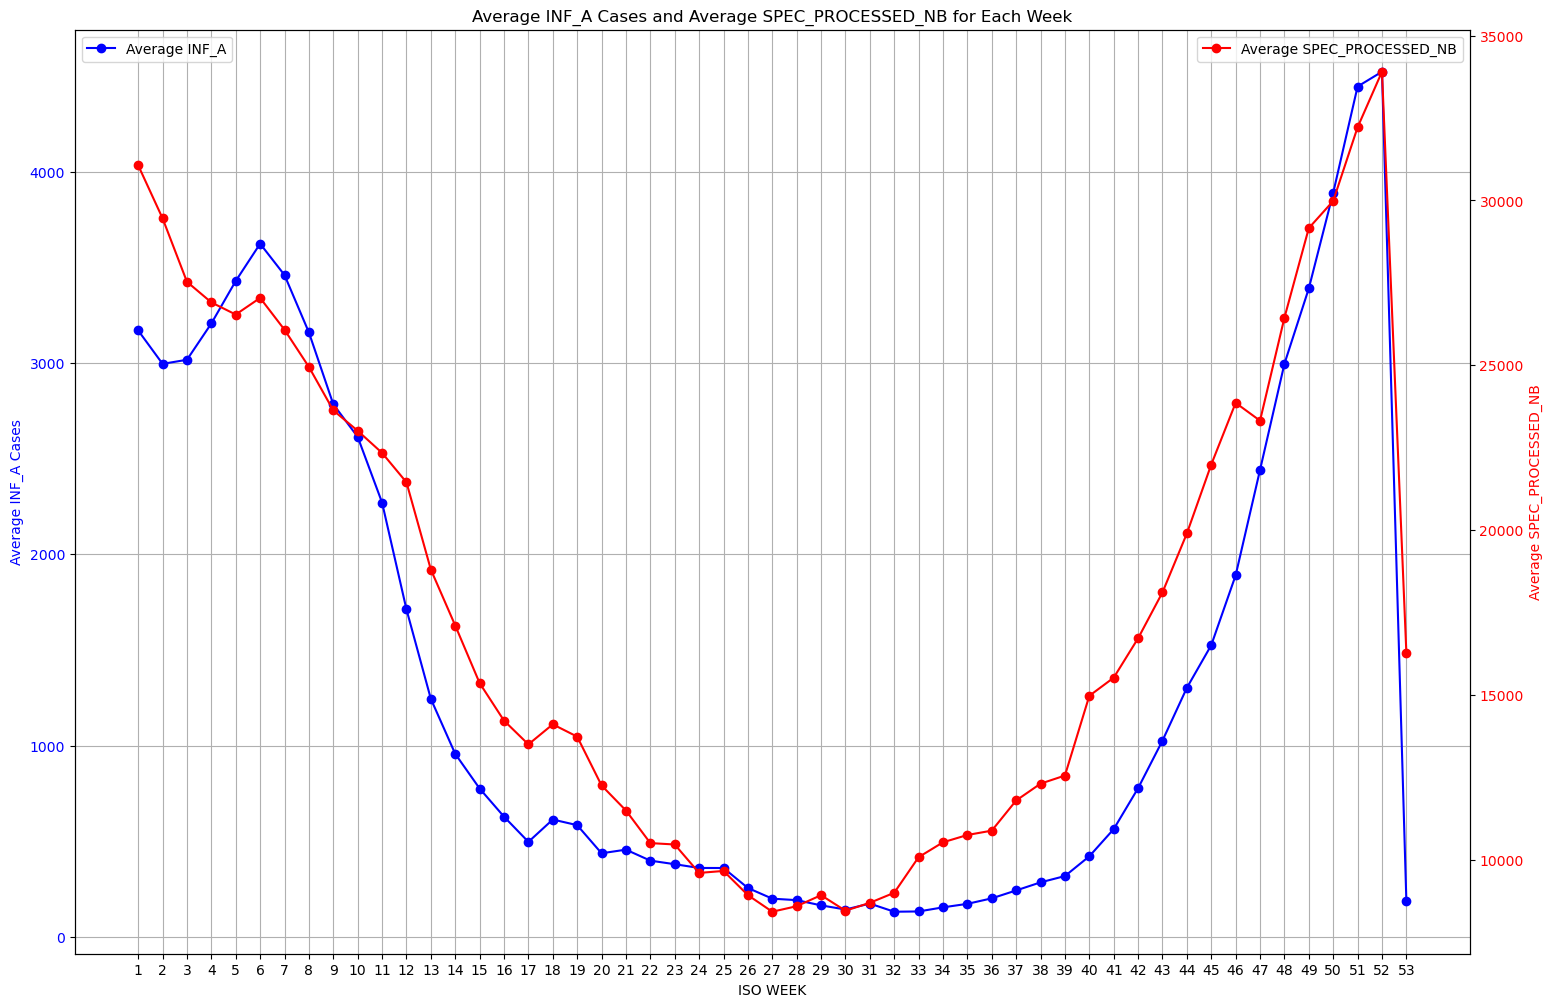

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# weekly_avg = df_final.groupby('ISO_WEEK')['INF_A'].mean().reset_index()

# plt.plot(weekly_avg['ISO_WEEK'], weekly_avg['INF_A'], marker='o')
# plt.title('Average Influenza A Cases for Each Week Across All Years')
# plt.xlabel('Weeks')
# plt.ylabel('Average Number of Influenza A Cases')
# plt.xticks(range(1, 54))
# plt.grid(True)
# plt.show()

weekly_avg_inf_a = df_final.groupby('ISO_WEEK')['INF_A'].mean().reset_index()

# Calculate the weekly average of SPEC_PROCESSED_NB
weekly_avg_spec = df_final.groupby('ISO_WEEK')['SPEC_PROCESSED_NB'].mean().reset_index()

# Merge the two DataFrames on ISO_WEEK
merged_data = pd.merge(weekly_avg_inf_a, weekly_avg_spec, on='ISO_WEEK')

# Plotting the data
fig, ax1 = plt.subplots(figsize=(18, 12))

# Plot the average INF_A
ax1.plot(merged_data['ISO_WEEK'], merged_data['INF_A'], marker='o', color='b', label='Average INF_A')
ax1.set_xlabel('ISO WEEK')
ax1.set_ylabel('Average INF_A Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the average SPEC_PROCESSED_NB
ax2 = ax1.twinx()
ax2.plot(merged_data['ISO_WEEK'], merged_data['SPEC_PROCESSED_NB'], marker='o', color='r', label='Average SPEC_PROCESSED_NB')
ax2.set_ylabel('Average SPEC_PROCESSED_NB', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and labels
plt.title('Average INF_A Cases and Average SPEC_PROCESSED_NB for Each Week')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(range(1, 54))

# Show grid
ax1.grid(True)

plt.show()


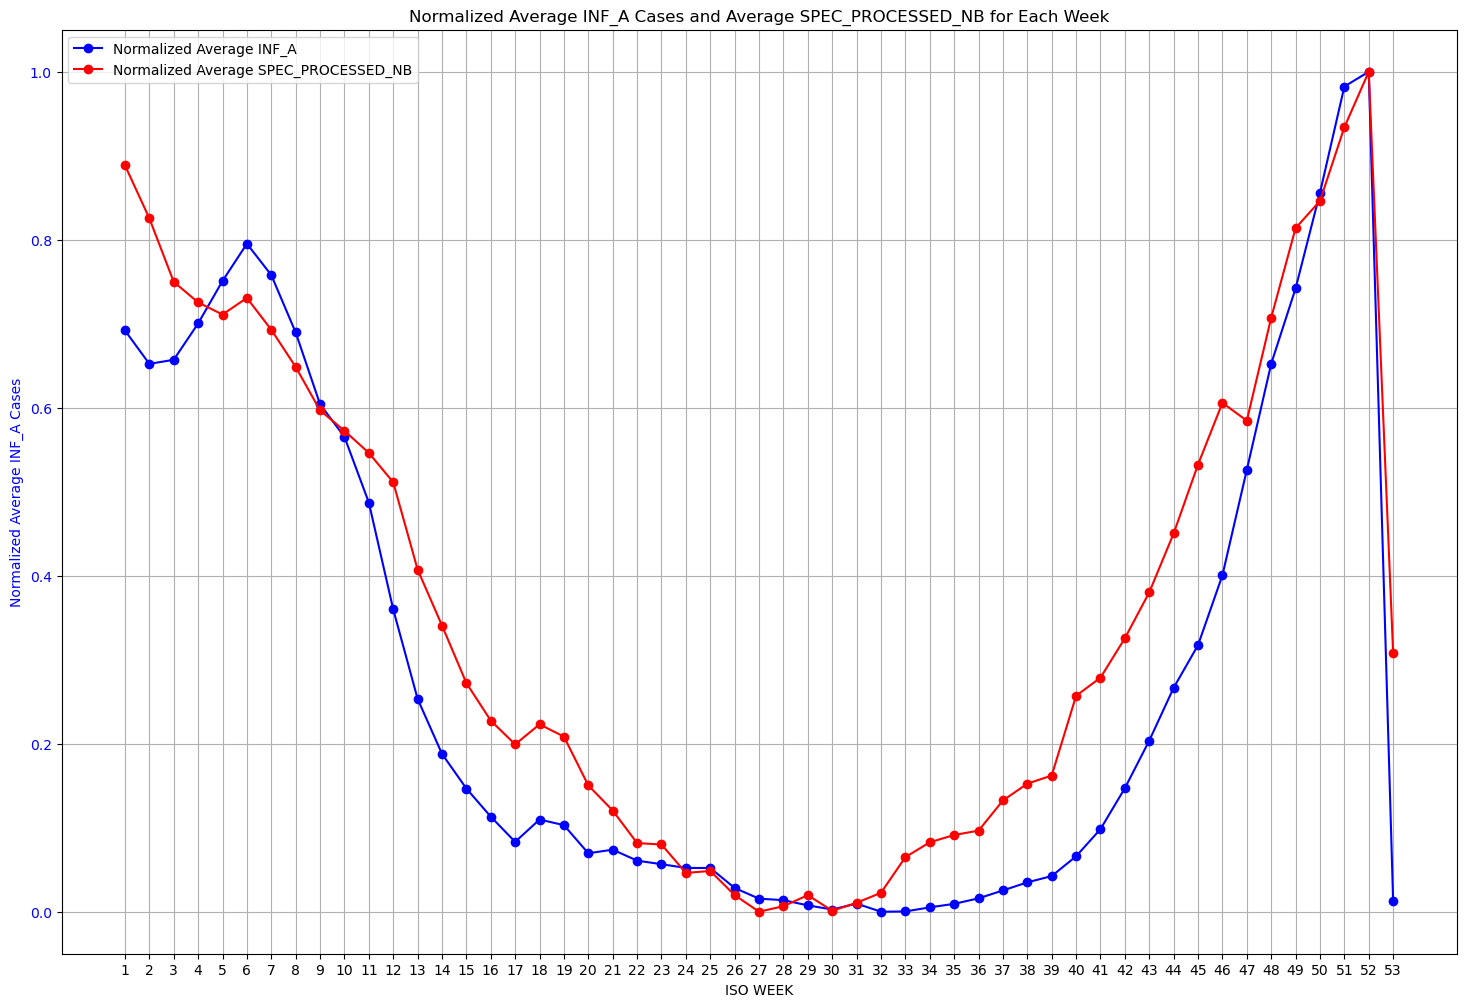

In [27]:
# Calculate the weekly average of INF_A
weekly_avg_inf_a = df_final.groupby('ISO_WEEK')['INF_A'].mean().reset_index()

# Calculate the weekly average of SPEC_PROCESSED_NB
weekly_avg_spec = df_final.groupby('ISO_WEEK')['SPEC_PROCESSED_NB'].mean().reset_index()

# Merge the two DataFrames on ISO_WEEK
merged_data = pd.merge(weekly_avg_inf_a, weekly_avg_spec, on='ISO_WEEK')

# Min-Max Normalization
merged_data['INF_A_normalized'] = (merged_data['INF_A'] - merged_data['INF_A'].min()) / (merged_data['INF_A'].max() - merged_data['INF_A'].min())
merged_data['SPEC_PROCESSED_NB_normalized'] = (merged_data['SPEC_PROCESSED_NB'] - merged_data['SPEC_PROCESSED_NB'].min()) / (merged_data['SPEC_PROCESSED_NB'].max() - merged_data['SPEC_PROCESSED_NB'].min())

# Plotting the data
fig, ax1 = plt.subplots(figsize=(18, 12))

# Plot the normalized INF_A
ax1.plot(merged_data['ISO_WEEK'], merged_data['INF_A_normalized'], marker='o', color='b', label='Normalized Average INF_A')
ax1.set_xlabel('ISO WEEK')
ax1.set_ylabel('Normalized Average INF_A Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot the normalized SPEC_PROCESSED_NB on the same y-axis
ax1.plot(merged_data['ISO_WEEK'], merged_data['SPEC_PROCESSED_NB_normalized'], marker='o', color='r', label='Normalized Average SPEC_PROCESSED_NB')

# Adding titles and labels
plt.title('Normalized Average INF_A Cases and Average SPEC_PROCESSED_NB for Each Week')

# Show legend
ax1.legend(loc='upper left')

plt.xticks(range(1, 54))

# Show grid
ax1.grid(True)

plt.show()

Mean INF_A cases per year:
     ISO_YEAR        INF_A
0       2007   359.961538
1       2008   565.665412
2       2009  3068.962264
3       2010   224.326923
4       2011   696.511706
5       2012   801.500000
6       2013   896.365385
7       2014  1511.615385
8       2015   946.454545
9       2016   783.500000
10      2017  1513.163462
11      2018  1737.153846
12      2019  2015.461538
13      2020  1419.704082
14      2021   386.326531
15      2022  4480.375000
16      2023  1368.182692

Total SPEC_PROCESSED_NB per year:
     ISO_YEAR  SPEC_PROCESSED_NB
0       2007           200355.0
1       2008           254125.0
2       2009           726170.0
3       2010           241820.0
4       2011           266881.0
5       2012           277556.0
6       2013           353461.0
7       2014           514838.0
8       2015           781001.0
9       2016           953715.0
10      2017          1289846.0
11      2018          1516760.0
12      2019          1572399.0
13      2020        

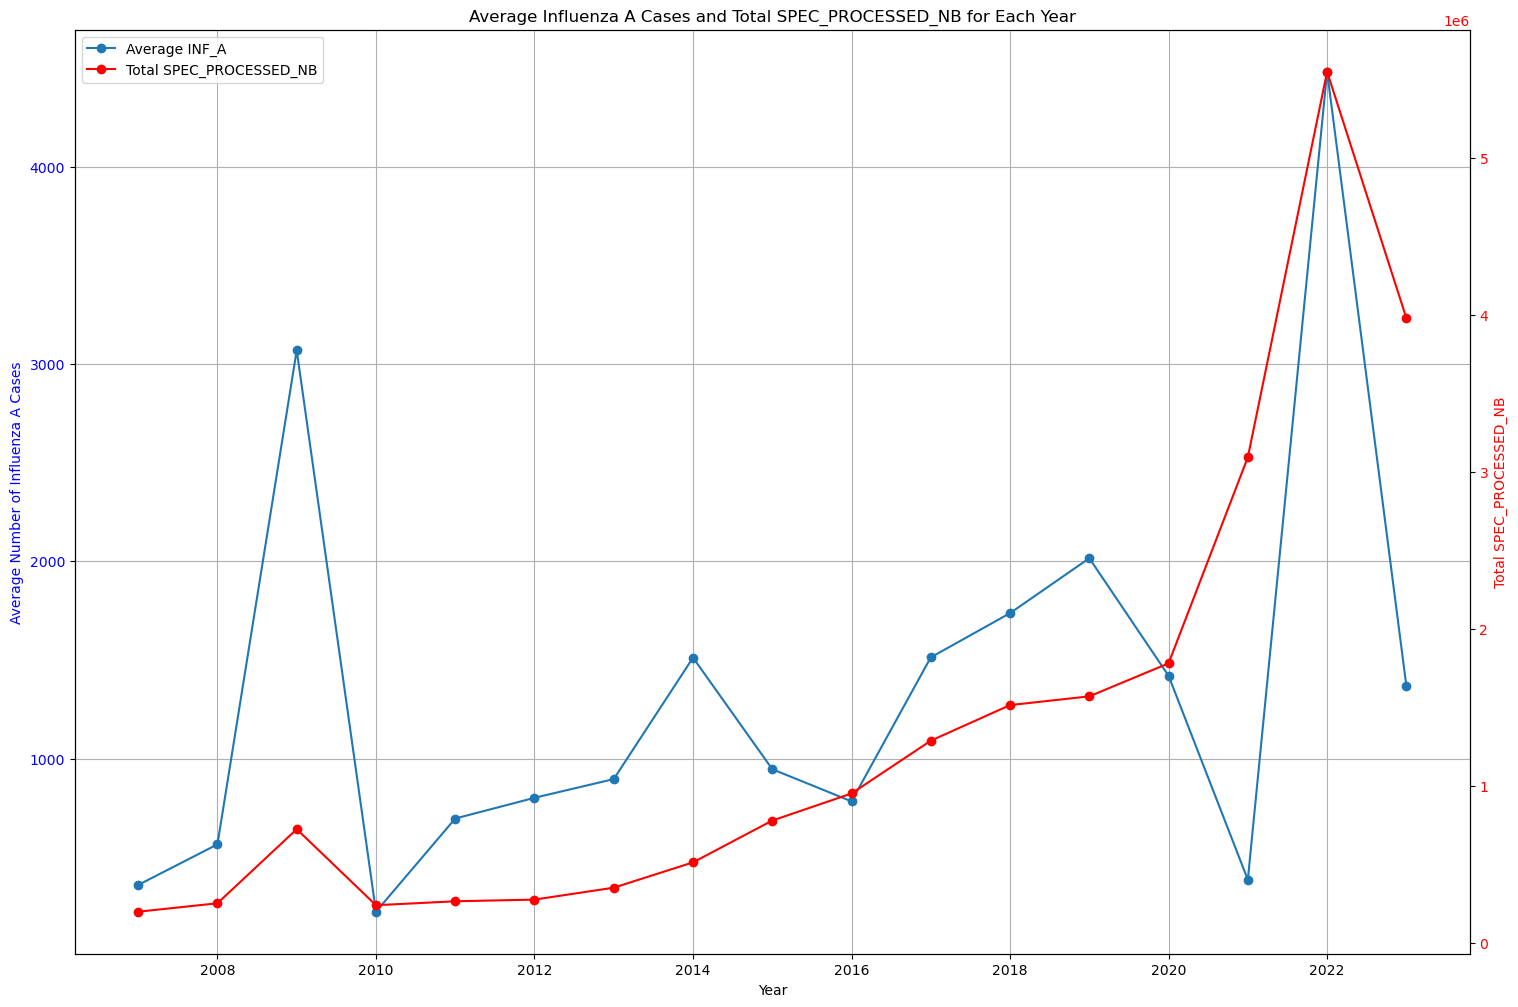

In [28]:
# annual_cases = df_final.groupby('ISO_YEAR')['INF_A'].mean().reset_index()

# plt.figure(figsize=(18, 12))
# plt.plot(annual_cases['ISO_YEAR'], annual_cases['INF_A'], marker='o')
# plt.xticks(annual_cases['ISO_YEAR'])
# plt.title('Average Influenza A Cases for Each Year')
# plt.xlabel('Weeks')
# plt.ylabel('Average Number of Influenza A Cases')
# plt.grid(True)
# plt.show()

annual_cases = df_final.groupby('ISO_YEAR')['INF_A'].mean().reset_index()

# Calculate the total SPEC_PROCESSED_NB for each year
annual_spec_total = df_final.groupby('ISO_YEAR')['SPEC_PROCESSED_NB'].sum().reset_index()

print("Mean INF_A cases per year:\n", annual_cases)
print("\nTotal SPEC_PROCESSED_NB per year:\n", annual_spec_total)

fig, ax1 = plt.subplots(figsize=(18, 12))

# Plot the average INF_A cases
line1, = ax1.plot(annual_cases['ISO_YEAR'], annual_cases['INF_A'], marker='o', label='Average INF_A')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Number of Influenza A Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the total SPEC_PROCESSED_NB
ax2 = ax1.twinx()
line2, = ax2.plot(annual_spec_total['ISO_YEAR'], annual_spec_total['SPEC_PROCESSED_NB'], marker='o', color='r', label='Total SPEC_PROCESSED_NB')
ax2.set_ylabel('Total SPEC_PROCESSED_NB', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and labels
plt.title('Average Influenza A Cases and Total SPEC_PROCESSED_NB for Each Year')

# Collect the handles and labels from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]

# Create a single legend and place it in the upper left corner
ax1.legend(lines, labels, loc='upper left')

# Show grid
ax1.grid(True)

plt.show()

Mean INF_A cases per year:
     ISO_YEAR        INF_A
0       2007   359.961538
1       2008   565.665412
2       2009  3068.962264
3       2010   224.326923
4       2011   696.511706
5       2012   801.500000
6       2013   896.365385
7       2014  1511.615385
8       2015   946.454545
9       2016   783.500000
10      2017  1513.163462
11      2018  1737.153846
12      2019  2015.461538
13      2020  1419.704082
14      2021   386.326531
15      2022  4480.375000
16      2023  1368.182692

Average SPEC_PROCESSED_NB per year:
     ISO_YEAR  SPEC_PROCESSED_NB
0       2007        3852.980769
1       2008        5082.500000
2       2009       13701.320755
3       2010        4650.384615
4       2011        5232.960784
5       2012        5337.615385
6       2013        6797.326923
7       2014        9900.730769
8       2015       11833.348485
9       2016        9170.336538
10      2017       12402.365385
11      2018       14584.230769
12      2019       15119.221154
13      2020      

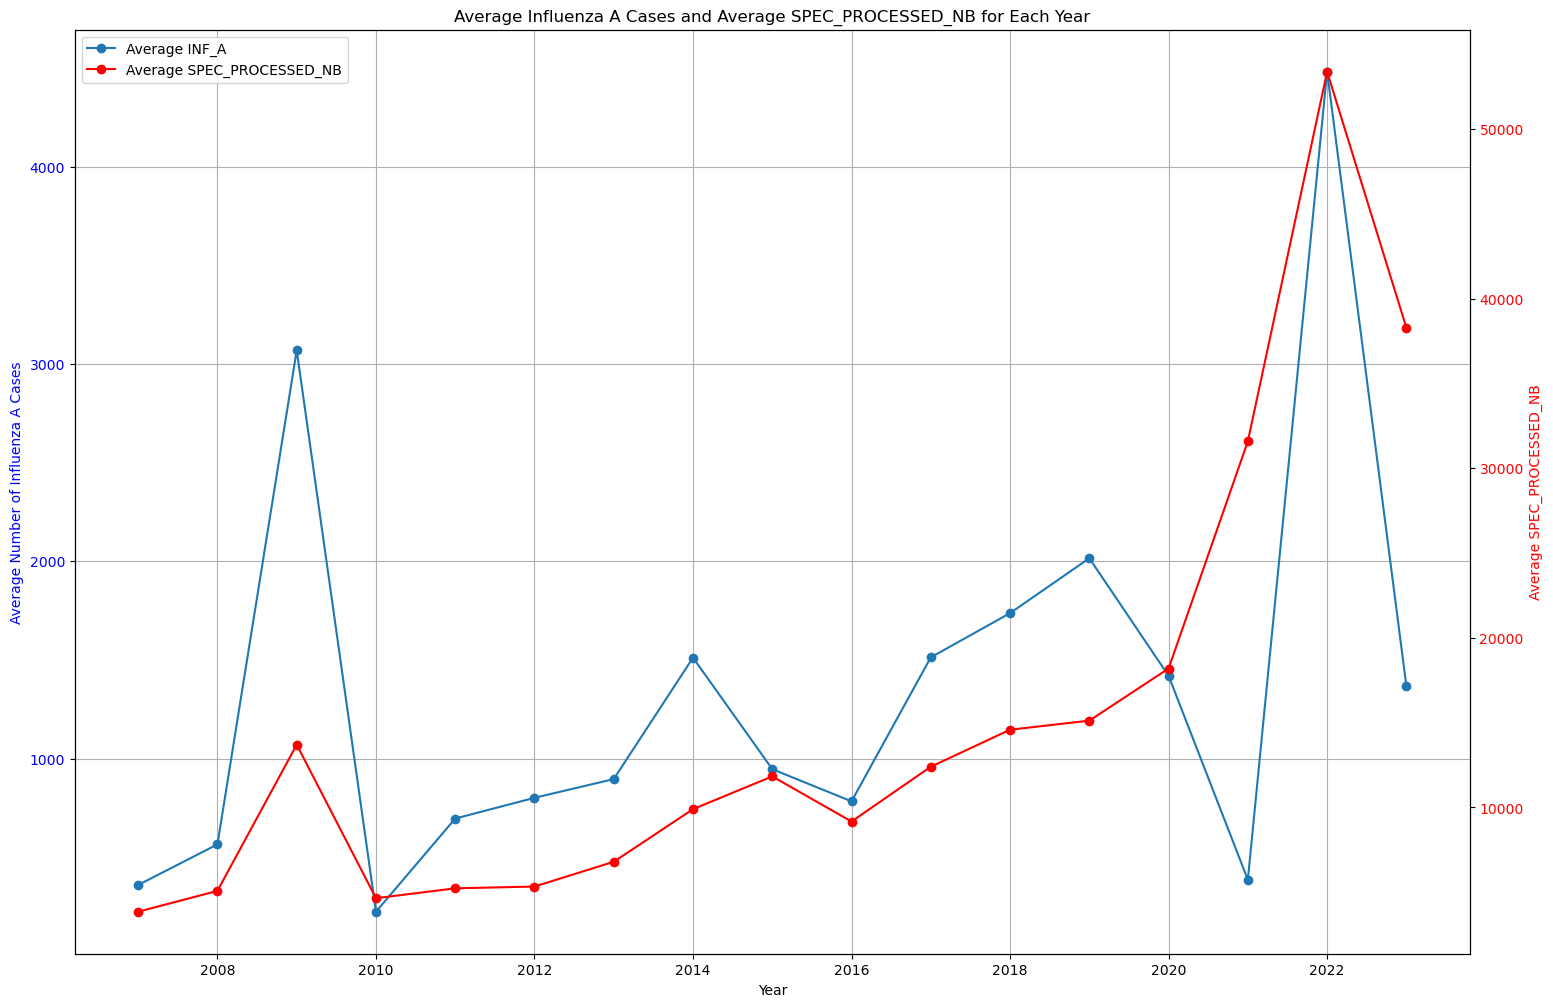

In [29]:
# Calculate the mean INF_A cases per year
annual_cases = df_final.groupby('ISO_YEAR')['INF_A'].mean().reset_index()

# Calculate the average SPEC_PROCESSED_NB for each year
annual_spec_avg = df_final.groupby('ISO_YEAR')['SPEC_PROCESSED_NB'].mean().reset_index()

print("Mean INF_A cases per year:\n", annual_cases)
print("\nAverage SPEC_PROCESSED_NB per year:\n", annual_spec_avg)

fig, ax1 = plt.subplots(figsize=(18, 12))

# Plot the average INF_A cases
line1, = ax1.plot(annual_cases['ISO_YEAR'], annual_cases['INF_A'], marker='o', label='Average INF_A')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Number of Influenza A Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the average SPEC_PROCESSED_NB
ax2 = ax1.twinx()
line2, = ax2.plot(annual_spec_avg['ISO_YEAR'], annual_spec_avg['SPEC_PROCESSED_NB'], marker='o', color='r', label='Average SPEC_PROCESSED_NB')
ax2.set_ylabel('Average SPEC_PROCESSED_NB', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and labels
plt.title('Average Influenza A Cases and Average SPEC_PROCESSED_NB for Each Year')

# Collect the handles and labels from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]

# Create a single legend and place it in the upper left corner
ax1.legend(lines, labels, loc='upper left')

# Show grid
ax1.grid(True)

plt.show()

In [30]:
import pingouin

#H0: influenza cases in 2022 are similar to influenza casess in other years

df_filtered = df_final[df_final['ISO_YEAR'].isin([2022] + list(range(2007, 2023)))]
df_filtered = df_filtered[['ISO_YEAR', 'INF_A']].dropna()
result = pingouin.kruskal(data=df_filtered, dv='INF_A', between='ISO_YEAR')

print(result)
if result['p-unc'].values[0] < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

           Source  ddof1           H         p-unc
Kruskal  ISO_YEAR     15  332.886976  7.903224e-62
reject the null hypothesis


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

#H0: There is no significant association between the year and the proportion of positive influenza cases

#calculate the number of negative cases for each year
df_final['NEG_A'] = df_final['SPEC_PROCESSED_NB'] - df_final['INF_A']

#create a contingency table
contingency_table = df_final.groupby('ISO_YEAR')[['INF_A', 'NEG_A']].sum()

# chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis


In [32]:
#H0: There is no significant difference in influenza cases in 2009 compared to other years.

years_of_interest = [2009] + list(range(2007, 2009)) + list(range(2010, 2023))
df_filtered = df_final[df_final['ISO_YEAR'].isin(years_of_interest)]

# Ensure the data contains no missing values
df_filtered = df_filtered[['ISO_YEAR', 'INF_A']].dropna()

# Perform the Kruskal-Wallis test
result = pingouin.kruskal(data=df_filtered, dv='INF_A', between='ISO_YEAR')

print(result)

if result['p-unc'].values[0] < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")
    
#there is a significant difference in influenza cases in 2009 compared to other years.

           Source  ddof1           H         p-unc
Kruskal  ISO_YEAR     15  332.886976  7.903224e-62
reject the null hypothesis


In [36]:
#H0:there is no significant association between the year and the proportion of positive influenza cases.

years_of_interest = [2009] + list(range(2007, 2009)) + list(range(2010, 2023))
df_filtered = df_final[df_final['ISO_YEAR'].isin(years_of_interest)]

contingency_table = df_filtered.groupby('ISO_YEAR')[['INF_A', 'NEG_A']].sum()

#chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies:\n{expected}')

# Interpretation of the p-value
if p < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")
    
#there is a significant association between the year and the proportion of positive influenza cases.

Chi-squared statistic: 516543.4935882083
p-value: 0.0
Degrees of freedom: 15
Expected frequencies:
[[  18196.44263795  182158.55736205]
 [  23115.09047894  231397.51097034]
 [  65951.4898575   660218.5101425 ]
 [  21962.33564777  219857.66435223]
 [  24271.06090021  242969.54779544]
 [  25207.91511477  252348.08488523]
 [  32101.68356793  321359.31643207]
 [  46758.10503774  468079.89496226]
 [  70931.29643224  710069.70356776]
 [  86617.35564599  867097.64435401]
 [ 117145.1111816  1172700.8888184 ]
 [ 137753.66891536 1379006.33108464]
 [ 142806.85886287 1429592.14113713]
 [ 161916.50671518 1620892.49328482]
 [ 281159.31067015 2814592.68932985]
 [ 504210.97847873 5047489.02152127]]
reject the null hypothesis


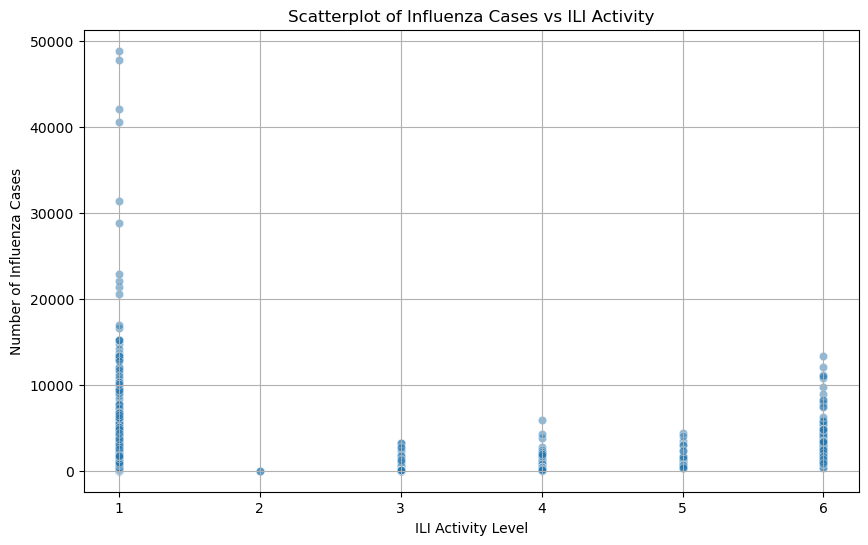

            n         r          CI95%     p-val   BF10     power
pearson  1300  0.022844  [-0.03, 0.08]  0.410522  0.049  0.130481
Correlation coefficient: 0.022844244107205647


In [37]:
# 1 = no report
# 2 = no activity
# 3 = sporadic
# 4 = local outbreak
# 5 = regional
# 6 = widespread

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='ILI_ACTIVITY', y='INF_A', alpha=0.5)
plt.title('Scatterplot of Influenza Cases vs ILI Activity')
plt.xlabel('ILI Activity Level')
plt.ylabel('Number of Influenza Cases')
plt.grid(True)
plt.show()

corr_result = pingouin.corr(df_final['INF_A'], df_final['ILI_ACTIVITY'])

# Output the results
print(corr_result)

# Interpretation
corr_value = corr_result['r'][0]
# p_value = corr_result['p-val'][0]

print(f'Correlation coefficient: {corr_value}')
# print(f'p-value: {p_value}')

# if p_value < 0.05:
#     print("correlation is statistically significant.")
# else:
#     print("correlation is not statistically significant.")
    
#weak positive relationship. As the ILI activity level increases, the number of influenza cases might increase slightly, but the relationship is almost negligible


In [19]:
#H0: There is no significant association between ILI activity and the number of influenza cases.

df_final['INF_A_Category'] = pd.qcut(df_final['INF_A'], q=2, labels=['Low', 'High'])

contingency_table = pd.crosstab(df_final['ILI_ACTIVITY'], df_final['INF_A_Category'])

# print("Contingency Table:")
# print(contingency_table)

#chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi-Square Statistic: {chi2}")
# print(f"P-value: {p}")
# print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)

# Interpretation
if p < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")
    
#there is a significant association between ILI activity and the number of influenza cases.

reject the null hypothesis
